# MATSUDA ALGORITHM SIMULATIONS
## Example

True


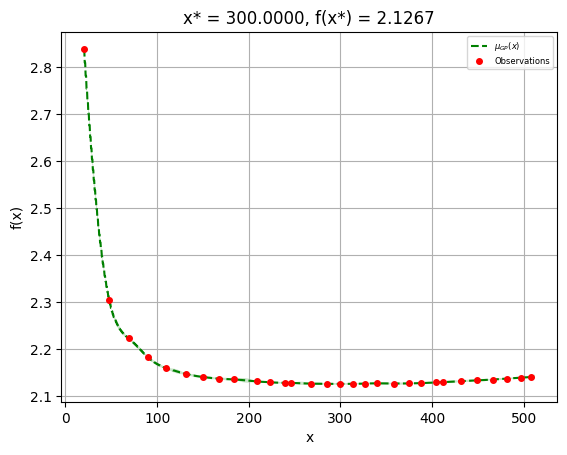

(np.float64(0.5241570090402949), np.int64(300))

In [5]:
from source import *

T = 1024
num_bins = 1024

# Define the parameters for a stationary 5x5 system
lambda_ = np.array([0.1, 0.1, 0.1, 0.1, 0.1]) * 3  # Baseline intensities for each process

X = 0.0
# # #
alpha_ = np.array([
    [0.2,  0.0, 0.3, 0.0, 0.3], # Process 1 excites multiple processes
    [0.3,  0.2, X, 0.0, 0.0], # Process 2 excites multiple processes
    [0.2,  X, 0.3, 0.0, 0.0], # Process 3 excites multiple processes
    [0.2,  0.2, 0.0, 0.3, 0.0], # Process 4 excites multiple processes
    [0.2,  0.0, 0.2, 0.0, 0.2] # Process 5 excites multiple processes
])


beta = np.array([1.0, 1.0, 1.0, 1.0, 1.0])  # Decay rates for each process

print(is_stationary(alpha_, beta))

theta_5x5 = lambda_, alpha_, beta

# Bayesian Optimization 
run_one_hawkes_simulation_hawkes(theta_5x5, T, num_bins, 100, bayesian_test=True)

In [6]:
num_simulations = 1000

items = range(num_simulations) 

# Parallelize the for loop
results = Parallel(n_jobs=-1)(delayed(run_one_hawkes_simulation_hawkes)(theta_5x5, T, num_bins, 100) for item in tqdm(items, desc="Processing items"))

Processing items: 100%|██████████| 1000/1000 [00:10<00:00, 94.40it/s]


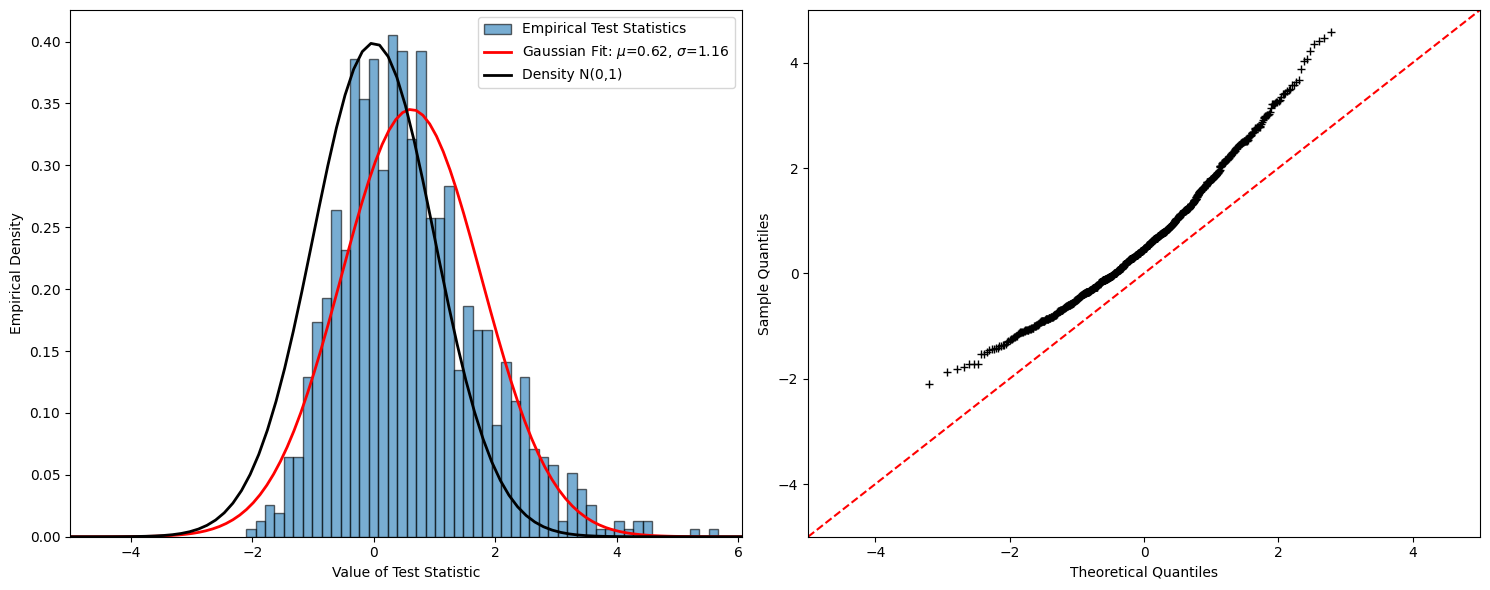

Mirror power:  0.185
The distribution is positively skewed (right tail is longer).


In [7]:
# Separate the list of tuples into individual lists
test_stats, _ = zip(*results)

# Convert the zipped objects to lists
test_stats = np.real(list(test_stats))
test_stats_greg = np.real(list(test_stats))
plot_test_stats_simulations(test_stats,
                            name=f"changed_hawkes_5_t={T}_n={num_bins}_X={X}_density_plots",
                            limit=-5)


print("Mirror power: ", np.sum(test_stats >= 1.646)/len(test_stats))

# Calculate the skewness
skewness = stats.skew(test_stats)

# Compare with standard normal distribution
if skewness == 0:
    print("The distribution is symmetrical (similar to a standard normal distribution).")
elif skewness > 0:
    print("The distribution is positively skewed (right tail is longer).")
else:
    print("The distribution is negatively skewed (left tail is longer).")

# MAXMIN STEPDOWN PROCEDURE
## Example


In [ ]:

addition_term = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 1.0, 0.0, 0.0], 
    [0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0], 
    [0.0, 0.0, 0.0, 0.0, 0.0] 
])

delta = 0.02

m_list = [10, 100,  300, 500]

edge = (1,2)

config = { 
            "T": T,
            "delta": delta,
            "addition_term": addition_term.tolist(),  # Convert NumPy array to list
            "m_list": m_list,
            "edge": edge,
            "theta": theta_5x5,
            "num_bins": num_bins
            
        }

config, results_per_m = run_simulation_and_save_results_hawkes(config, max_value=25, num_simulations=1000, force_save=True, tag="_final_positive")